In [12]:
from mesa.batchrunner import BatchRunner
from AB_model import *

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
# rewire_list = []
# for i in range(21):
#     rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]
#new_edge_num_list = range(1,20)

fixed_params = {"num_nodes": 1000,
               "initial_outbreak_size" : 1,
               "threshold" : 2,
               #"inf_prob" : 1,
               "new_edge_num": 8,
               }
variable_params = {"inf_prob": [0.3,0.4]}  
batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=30,
                        max_steps=2000,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

60it [20:15, 20.26s/it]


In [13]:
run_data = batch_run.get_model_vars_dataframe()

In [27]:
run_data.inf_prob

0     0.3
1     0.3
2     0.3
3     0.3
4     0.3
5     0.3
6     0.3
7     0.3
8     0.3
9     0.3
10    0.3
11    0.3
12    0.3
13    0.3
14    0.3
15    0.3
16    0.3
17    0.3
18    0.3
19    0.3
20    0.3
21    0.3
22    0.3
23    0.3
24    0.3
25    0.3
26    0.3
27    0.3
28    0.3
29    0.3
30    0.4
31    0.4
32    0.4
33    0.4
34    0.4
35    0.4
36    0.4
37    0.4
38    0.4
39    0.4
40    0.4
41    0.4
42    0.4
43    0.4
44    0.4
45    0.4
46    0.4
47    0.4
48    0.4
49    0.4
50    0.4
51    0.4
52    0.4
53    0.4
54    0.4
55    0.4
56    0.4
57    0.4
58    0.4
59    0.4
Name: inf_prob, dtype: float64

In [23]:
import pandas
from collections import Counter
count = Counter(time)

plt.bar(np.arange(count), np.bincount(time, minlength=13)[1:])
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')


TypeError: unsupported operand type(s) for -: 'Counter' and 'int'

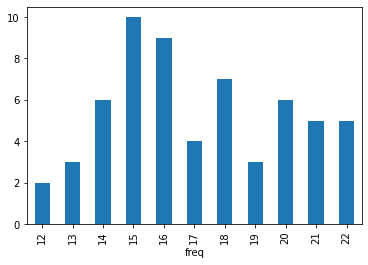

In [25]:
import pandas as pd
df = pd.DataFrame({'freq': time})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Infection_time'>

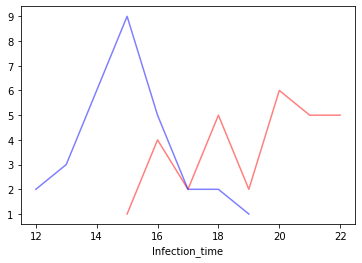

In [37]:
import pandas as pd
d = {'Infection_probability':run_data.inf_prob, 'Infection_time':time}
df = pd.DataFrame(d)
df_1=df[df.Infection_probability == 0.3]
df_1.groupby('Infection_time', as_index=True).size().plot(kind='line', color ='red',alpha = 0.5)

df_2=df[df.Infection_probability != 0.3]
df_2.groupby('Infection_time', as_index=True).size().plot(kind='line', color ='blue',alpha = 0.5)

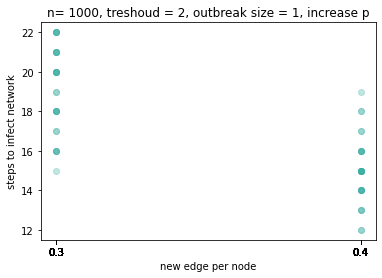

In [15]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['inf_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("new edge per node")
plt.ylabel("steps to infect network")
plt.title("n= 1000, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

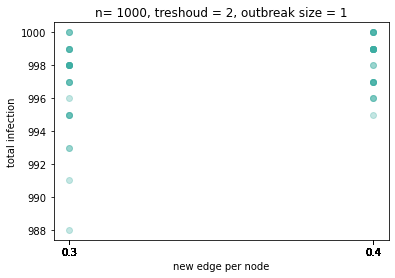

In [16]:
x = run_data['inf_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("new edge per node")
plt.ylabel("total infection")
plt.title("n= 1000, treshoud = 2, outbreak size = 1")
plt.xticks(x)
plt.show()

## 1 - Test and Visualize models

In [1]:
from AB_model import *

# from batchrun import *

In [2]:
model = InfoSpread (num_nodes=1000, new_edge_num=8, rewire_prob=0.1, initial_outbreak_size=1, threshold =2, inf_prob_model = 0.5)
#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
for i in range(50):
    model.step()

TypeError: __init__() got an unexpected keyword argument 'rewire_prob'

In [ ]:
df = model.datacollector.get_model_vars_dataframe()

## 2 - Batch Run to find out the determing parameter for rewiring P

In [ ]:
 from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"num_nodes": 1000,
               "avg_node_degree": 8,
               "initial_outbreak_size" : 1,
               "threshold" : 2,
               "inf_prob_model" : 0.5,
               }
variable_params = {"rewire_prob": rewire_list}  #  {"rewire_prob": drange(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations= 3,
                        max_steps=50,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

In [ ]:
run_data = batch_run.get_model_vars_dataframe()

In [ ]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['rewire_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("steps to infect network")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

In [ ]:
x = run_data['rewire_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("total infection")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

In [ ]:
run_data.to_csv('40_itr_change_p.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('40_itr_change_p.csv')
df

# Appendix - Legacy code

## 1 - Visualizaion for a single step

In [ ]:
model = InfoSpread (num_nodes=1000, avg_node_degree=3, rewire_prob=.3, initial_outbreak_size=1, threshold = 2,)
total_inf = [-1, 0] #buffer item
total_inf.append(number_infected(model))
while( total_inf[len(total_inf)-1] != total_inf[len(total_inf)-2] ):
    model.step()
    total_inf.append(number_infected(model))

In [ ]:
df = model.datacollector.get_model_vars_dataframe()
df

In [ ]:
inf_count = []
state_color = []
for i in model.grid.get_cell_list_contents(model.G):
    inf_count.append(i.get_infected_neighbor_count())
    state = i.state
    if state == 1:
        state_color.append('#ED553B') # red
    elif state == -1:
        state_color.append('#3CAEA3') # green
    else:
        state_color.append('#F6D55C') #yellow       
        
inf_dic =  {}
for i in range(model.num_nodes):
    inf_dic.update({i:(str(i),inf_count[i])})

In [ ]:
nx.draw_kamada_kawai(model.G, node_size=300,node_color=state_color, labels=inf_dic, alpha = 0.8)  

## 2 - Test other parameter in batchrun

In [ ]:
from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"rewire_prob":0.15,
                "num_nodes": 80,
               "initial_outbreak_size" : 1,
                "threshold" : 2
                }
variable_params = {"avg_node_degree": range(2,20)
                  
                  }  #  {"rewire_prob": range(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

In [ ]:
run_data = batch_run.get_model_vars_dataframe()

In [ ]:
run_data

In [ ]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['rewire_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("steps to infect network")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

In [ ]:
x = run_data['rewire_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("total infection")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

### 2.3 Testing batch run with changing rewireing factor

In [ ]:
#batch running test 2
from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"num_nodes": 80,
               "avg_node_degree": 8,
               "initial_outbreak_size" : 1,
               "threshold" : 2}
variable_params = {"rewire_prob": rewire_list}  #  {"rewire_prob": drange(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

In [ ]:
run_data = batch_run.get_model_vars_dataframe()
#run_data

In [ ]:
import matplotlib.pyplot as plt
import numpy

In [ ]:

x = run_data['rewire_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3',alpha = 0.3)

In [ ]:
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#ED553B', alpha = 0.3)

## 3 - Centola Replication

In [ ]:
from mesa.batchrunner import BatchRunner

In [ ]:
#num_nodes=40000, avg_node_degree=8, rewire_prob=a changing, initial_outbreak_size=1, threshold = 3
rewire_list = []
for i in range(201):
    rewire_list.append(round((i*0.005),4))

fixed_params = {"avg_node_degree":8,
                "num_nodes": 1000,
               "initial_outbreak_size" : 1,
                "threshold" : 2
                }
variable_params = {
                      "rewire_prob": [0.000001, 0.00001,0.0001,0.001,0.01,0.1,1]
                  }  #  {"rewire_prob": range(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=1,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

In [ ]:
run_data = batch_run.get_model_vars_dataframe()
run_data

In [ ]:
time = calculate_infection_time(run_data)

In [ ]:
time

In [ ]:
plt.plot(run_data.rewire_prob,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xscale('log')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = run_data.rewire_prob
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewiring probability")
plt.ylabel("steps to infect network")
plt.title("40 agents, 8 avergae neighbors, 3 treshold")
plt.xticks(x)
plt.xscale('log')
plt.show()

In [ ]:
x = run_data['rewire_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("average node degree")
plt.ylabel("total infection")
plt.title("control rewire prob = 0.15, treshoud = 2, outbreak size = 2,")
plt.xticks(x)
plt.xscale('log')
plt.show()

In [ ]:
#num_nodes=240000, avg_node_degree=48, rewire_prob=a changing, initial_outbreak_size=1, threshold = 19
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"rewire_prob":0.15,
                "num_nodes": 80,
               "initial_outbreak_size" : 1,
                "threshold" : 2
                }
variable_params = {"avg_node_degree": range(2,20)
                  
                  }  #  {"rewire_prob": range(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

## 4 - Making a visualization Server (Doesn't work)

In [ ]:
chart = ChartModule([
        {"Label": "Infected", "Color": "#FF0000"},
        {"Label": "Susceptible", "Color": "#008000"},
        {"Label": "Resistant", "Color": "#808080"},
    ])

server = ModularServer(InfoSpread,
                       [ MyTextElement(), chart],
                       "Complex Comtagion Batch Run")

In [ ]:
server.port = 8521 # The default
server.launch()